# TP 1 - Séance I
## Qualité d'image

In [3]:
# Importe les modules qui seront utilisé dans le laboratoire.
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 7)


# Exercice I (7 points): Étude de la résolution
## Mesure de la résolution spatiale

**1.** Ouvrez et affichez l'image ```resolution.png```.

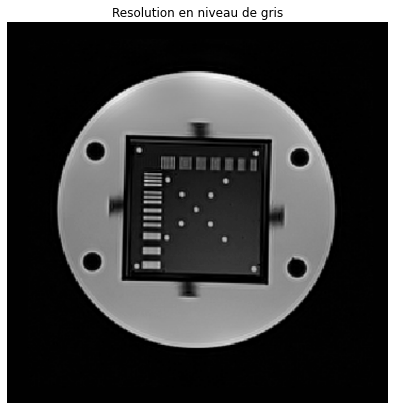

0.5686275


In [66]:
img = imread('resolution.png')

imshow(img, cmap='gray')
plt.axis('off') # Désactive les axes gradués
plt.title("Resolution en niveau de gris")
plt.show()


**2.** La largeur du cube central est de 10 cm. En déduire la largeur d'un pixel en millimètre.

0.5102040816326531


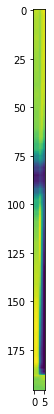

In [15]:
# Les coordonnées des coins supérieurs du carré sont: (160,151) et (356, 157).

cube = img[160:356, 151:157]
imshow(cube)

# Sur les lignes: 
npixels_ligne = 356-160 
largeur_pixel = 100/npixels_ligne # en mm
print(largeur_pixel)

[height, width] = img.shape # 1 seul canal, 512x512 pixels

**3.** Définissez la méthode ```downsample(img, f)```:

In [67]:
def downsample(img, f):
    """ Sous-échantillone l'image img d'un facteur f
    @param img  L'image à sous-échantilloner.
    @param f    Le facteur de sous-échantillonage (un pixel sur f est conservé).
    @return     L'image sous-échantillonée: sa taille est celle d'img divisée par f.
    """
    height = 512
    width = 512
    
    h = int(height/f)
    w = int(width/f)
    
    img_copy = np.zeros((h, w))
      
    for i in range(h):        
        for j in range(w):
            img_copy[i,j] = img[i*f,j*f]
            
    return img_copy

# img_copy = img[0::f,0::f]
# facon de faire de gab-ariane



**4.** Affichez les images sous-échantillonnées avec ```f=2,5,8```. Comment évolue la largeur d'un pixel lors du sous-échantillonage?

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
img_copy = downsample(img, 2)
ax1.imshow(img_copy)

img_copy = downsample(img, 5)
ax2.imshow(img_copy)

img_copy = downsample(img, 8)
ax3.imshow(img_copy)

# fig.show()
# enlever axes ?
# LARGEUR PIXEL !!!

**5.** Affichez les profils d'intensités le long d'axes perpendiculaires aux mires. Quelle est l'épaisseur de la plus petite mire observable?

In [1]:
# Pour les deux profils vous pouvez prendre: y=201:341, x=200 et y=190, x=206:346.

# mires_horizontales = img[201:341, 200:215]
# mires_verticales = img[185:200, 206:346]

# fig, (ax1, ax2) = plt.subplots(2,1)
# ax2.imshow(mires_horizontales, cmap='gray')
# ax1.imshow(mires_verticales, cmap='gray')

# plt.show()


# afficher intensites
mires_horizontales = img[201:341, 200]
mires_verticales = img[190, 206:346]

unit = np.linspace(0, 140, 140)

plt.figure()
plt.plot(unit, mires_horizontales)

plt.figure()
plt.plot(unit, mires_verticales)

NameError: name 'img' is not defined

**6.** Discutez de la relation entre la résolution de l'image (largeur d'un pixel) et la taille du plus petit objet observable. Sachant la résolution, quelle est la taille minimale observable? Est-elle garantie?


## Mesure de l'épaisseur de coupe

**7.** Affichez les profils d'intensités des 4 rampes et mesurer graphiquement la largeur des gaussiennes à mi-hauteur 

*Indice*: Vous pouvez normaliser le signal sur une gamme d’intensité plus facile à manipuler. Vous pouvez ensuite tracer une ligne horizontale pour vous aider à mesurer la largeur à mi-hauteur. Affichez les grilles sur les graphiques, puis augmentez la fréquence des ticks et la taille de l'image pour faciliter la mesure.

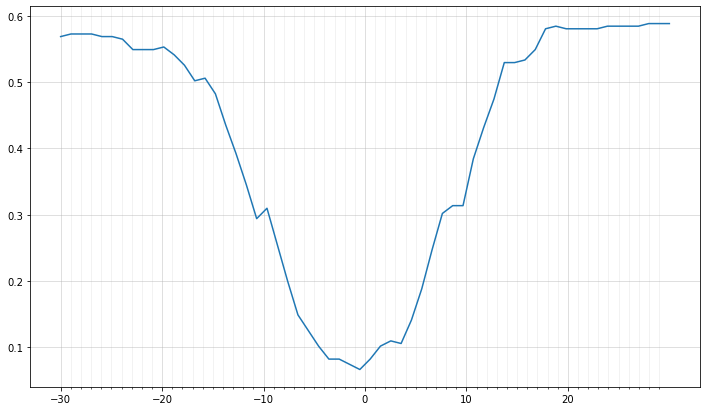

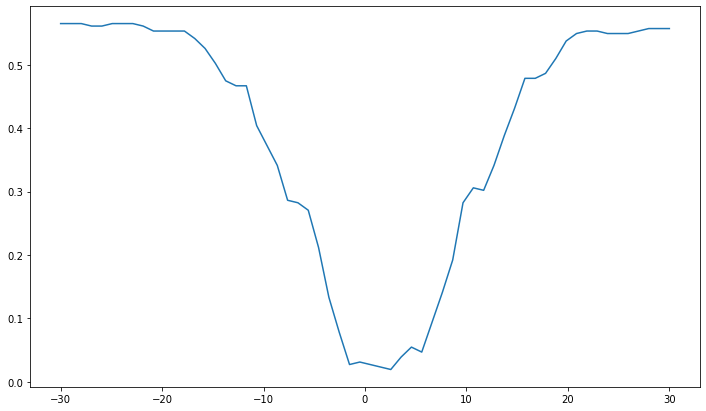

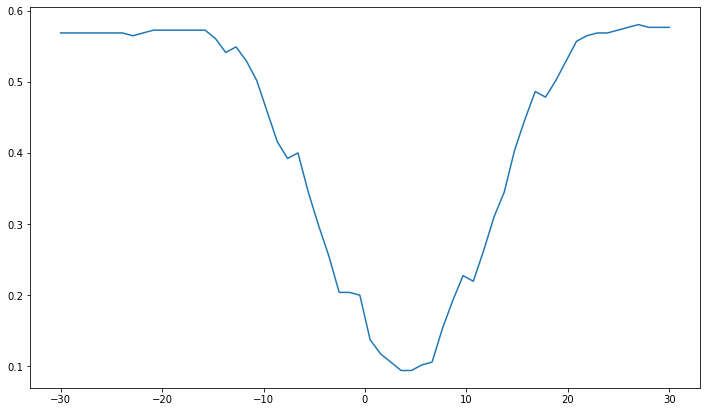

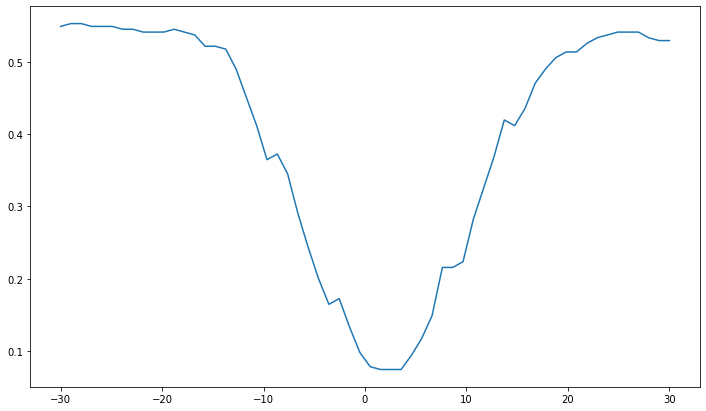

In [90]:
# Pour les coordonnées des profils on peut prendre:

largeur = np.linspace(-30, 30, 60)   # expliquer pk on a fait ca (pas de nbre magique)
# IL RESTE NORMALISER L'INTENSITE !!!


# y=140; x=230:290
fig, ax = plt.subplots()
rampe1 = img[140, 230:290]
ax.plot(largeur, rampe1)
#plt.grid()

# Major ticks every 10, minor ticks every 1
major_ticks = np.arange(-30, 30, 10)
minor_ticks = np.arange(-30, 30, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
#ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()


# y=230:290; x=365
rampe2 = img[230:290, 365]
rampe2 = np.transpose(rampe2)
plt.plot(largeur, rampe2)
plt.show()

# y=360; x=210:270
rampe3 = img[360, 210:270]
plt.plot(largeur, rampe3)
plt.show()

# y=215:275; x=147
rampe4 = img[215:275, 147]
rampe4 = np.transpose(rampe4)
plt.plot(largeur, rampe4)
plt.show()

#fig.show()





**8.** L'épaisseur de la coupe est donnée par $e=\tan(14^\circ) \times FWHM$ où $FWHM$ est la largeur à mi-hauteur en mm.
Sachant que les paramètres de l'IRM indiquent une épaisseur de coupe théorique de $2\pm0.2$ mm, passerait-il le controle qualité?

# Exercice II (6 points): Analyse du contraste et du bruit
## Mesure du contraste

**1.** Chargez  et affichez l'image ```contraste.png```.

**2.** Chargez  et affichez les 4 matrices ```vial1.npy```, ```vial2.npy```, ```vial3.npy```, ```vial4.npy```.

In [ ]:
# Utilisez np.load('fichier.npy') pour charger une matrice numpy.

**3.** Définissez et affichez le masque du fond du fantôme qui est constitué du carré central privé des 4 ampoules.
Pour le carré central vous pourrez prendre la région: 

$174\leq y<330$ et $178\leq x<331$

In [ ]:


zerosMatrix = np.zeros(contrasteImg.shape, dtype=bool)

**4.** Calculez l'intensité moyenne sur ces 4 régions et sur le fond du fantôme. En déduire le contraste entre chaque ampoule et le fond du fantôme.

In [ ]:
# Pour extraire la valeur des pixels d'une image appartenant à un masque on utilise la syntaxe:
# image[masque]  (où image et masque on la même taille et où masque est une matrice booléenne)

fond = ImgInitial[zeroMatrix]

Rond1 = ImgInitial[vial1]

## Mesure du rapport signal/bruit

**5.** Chargez et affichez l'image ```bruit.png```. (Conservez les axes et afficher une grille).

**6.** En vous aidant de l'image affichée à la question précédente, sélectionner grossièrement la région d'intéret et les 4 zones de fond. 

Puis calculez le rapport signal bruit en décibel.

In [ ]:
Fatima:
    SNR differentiel


**7.** Que représente le rapport signal/bruit? Est-il préférable d'avoir un SNR faible ou fort?



# Exercice III (bonus, 1.5 points)
## Comparaison d'imageries intra-vasculaires

**1.** Chargez et affichez les deux images ```echo.png``` et ```oct.png```. Convertissez l'image OCT en niveau de gris en sélectionnant son canal rouge.


Affichez les portions des images concernées par les masques ```echo_lum.npy```, ```echo_paroi.npy```, ```oct_lum.npy``` et ```oct_paroi.npy``` (en multipliant l'image par son masque).

In [ ]:

echolum = img*masque
plt.figure()
plt.imshow(echolum)

**2.** Calculez le contraste entre la paroi et la lumière du vaisseau ainsi que le SNR des deux modalités.

In [ ]:
# Si les aires de région d'intéret et de fond sont différentes, on prend l'aire du fond dans la formule du SNR.

**3.** Discutez du choix entre l'OCT et de l'echocardiographie pour une simple mesure du diamètre de la lumière du vaisseau.
